In [1]:
import pickle

import matplotlib.pyplot as plt

from tsml_eval.evaluation import evaluate_classifiers_by_problem

# classifiers = ["ROCKET", "TSF", "1NN-DTW", "RSTC(f_Stat)", "RSTC(KW)", "RSTC(MM)"]
classifiers = [
    "Wasserstein",
    "Moods Median",
    "Kruskal Wallis",
    "F-Stat",
    "Info Gain",
    "Kolmogorov",
    "Info Gain(no_early_abandon)",
]
# datasets = ["ItalyPowerDemand", "Trace", ]

datasets = [
    "ACSF1",
    "Adiac",
    "ArrowHead",
    "Beef",
    "BeetleFly",
    "BirdChicken",
    "BME",
    "Car",
    "CBF",
    "ToeSegmentation1",
    "ToeSegmentation2",
    "Trace",
    "TwoLeadECG",
    "UWaveGestureLibraryZ",
    "Wafer",
    "Wine",
    "WordSynonyms",
    "Worms",
    "WormsTwoClass",
    "Yoga",
]


evaluate_classifiers_by_problem(
    "../../Runtime Data/5000",
    classifiers,
    datasets,
    "./generated_results/",
    resamples=2,
    eval_name="ExampleEval",
)

/Users/abhashshrestha/anaconda3/lib/python3.11/site-packages/aeon/base/__init__.py:24: FutureWarning: The aeon package will soon be releasing v1.0.0 with the removal of legacy modules and interfaces such as BaseTransformer and BaseForecaster. This will contain breaking changes. See aeon-toolkit.org for more information. Set aeon.AEON_DEPRECATION_WARNING or the AEON_DEPRECATION_WARNING environmental variable to 'False' to disable this warning.
  warnings.warn(




All results present, continuing evaluation.

Estimators (7): ['F-Stat', 'Info Gain', 'Info Gain(no_early_abandon)', 'Kolmogorov', 'Kruskal Wallis', 'Moods Median', 'Wasserstein']

Datasets (20): ['ACSF1', 'Adiac', 'ArrowHead', 'BME', 'Beef', 'BeetleFly', 'BirdChicken', 'CBF', 'Car', 'ToeSegmentation1', 'ToeSegmentation2', 'Trace', 'TwoLeadECG', 'UWaveGestureLibraryZ', 'Wafer', 'Wine', 'WordSynonyms', 'Worms', 'WormsTwoClass', 'Yoga']

Resamples (2): [0, 1]



/Users/abhashshrestha/Documents/test_clone/tsml-eval/tsml_eval/evaluation/multiple_estimator_evaluation.py:1310: UserWarning: Estimators F-Stat and Info Gain have the same performanceon all datasets. This may cause problems when forming cliques.
  p_values = wilcoxon_test(average_stats, estimators, lower_better=not higher_better)
/Users/abhashshrestha/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Users/abhashshrestha/anaconda3/lib/python3.11/site-packages/aeon/visualisation/results/_critical_difference.py:217: UserWarning: Estimators F-Stat and Info Gain have the same performanceon all datasets. This may cause problems when forming cliques.
  p_values = wilcoxon_test(ordered_scores, ordered_labels, lower_better)
/Users/abhashshrestha/Documents/test_clone/tsml-eval/tsml_eval/evaluatio

In [6]:
with open("./generated_results/ExampleEval/ExampleEval_summary.csv", "rb") as f:
    for _ in range(3):
        print(f.readline().decode("utf-8").strip())

testAccuracy,Kolmogorov,Kruskal Wallis,Info Gain(no_early_abandon),Moods Median,F-Stat,Info Gain,Wasserstein
testAccuracyMean,0.862010877519881,0.860038595319552,0.8579299771018316,0.8603725511336698,0.8559040726569732,0.8559040726569732,0.8293457684833884
testAccuracyAvgRank,3.35,3.475,3.85,3.9,3.95,3.95,5.525


In [ ]:
# ACCURACIES

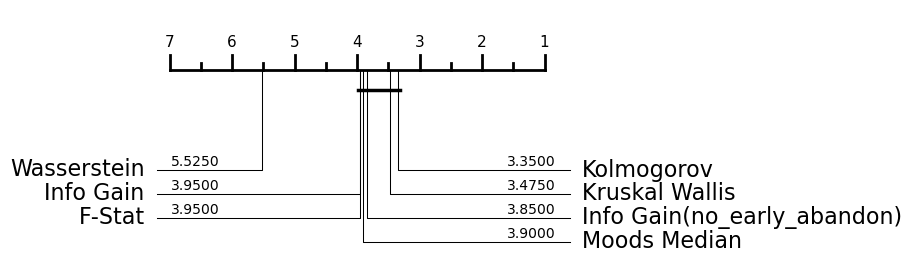

In [7]:
with open(
    "./generated_results/ExampleEval/Accuracy/figures/"
    "ExampleEval_accuracy_critical_difference.pickle",
    "rb",
) as f:
    fig = pickle.load(f)
plt.show()

In [ ]:
# RUNTIMES 5000 shapelets

/Users/abhashshrestha/anaconda3/lib/python3.11/site-packages/aeon/base/__init__.py:24: FutureWarning: The aeon package will soon be releasing v1.0.0 with the removal of legacy modules and interfaces such as BaseTransformer and BaseForecaster. This will contain breaking changes. See aeon-toolkit.org for more information. Set aeon.AEON_DEPRECATION_WARNING or the AEON_DEPRECATION_WARNING environmental variable to 'False' to disable this warning.
  warnings.warn(
/var/folders/9q/w7dg5r0s76sb6z8r8j3k4ll80000gn/T/ipykernel_94405/2004281683.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  cd.show()


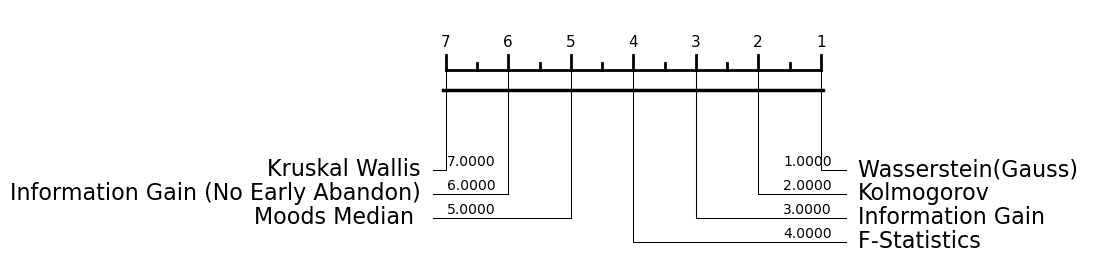

In [1]:
import numpy as np
from aeon.visualisation import plot_critical_difference

# Step 1: Read lines 22 and 23 from the CSV file
lines_to_read = [33, 34]
lines_data = []

with open(
    "/Users/abhashshrestha/Documents/Experiment_Out_RSTC/Univariate/Runtimes/Runtime_5k.csv",
    "rb",
) as f:
    for i, line in enumerate(f):
        if i + 1 in lines_to_read:
            lines_data.append(line.decode("utf-8").strip())
        if i + 1 > max(lines_to_read):
            break

estimator_names_line = lines_data[0]
average_run_time_line = lines_data[1]

estimator_names = estimator_names_line.split(",")[1:]  # skip the first element

average_run_time_data = [
    float(time) for time in average_run_time_line.split(",")[1:] if time
]
average_run_time_data = np.array(average_run_time_data, dtype=np.float64).reshape(1, -1)

cd, h = plot_critical_difference(
    average_run_time_data, estimator_names, lower_better=True
)

# Show the plot
cd.show()